In [1]:
from transformers import DetrForObjectDetection, DetrImageProcessor
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
# Load the model and processor
model = DetrForObjectDetection.from_pretrained('facebook/detr-resnet-50')
processor = DetrImageProcessor.from_pretrained('facebook/detr-resnet-50')


Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
# Load an image
url = "https://images.squarespace-cdn.com/content/v1/6125a87e4ceb55443b102657/add436db-e3ed-42bb-b611-0d221f85dfbc/NMGS2886.jpg"

# url = "http://images.cocodataset.org/test-stuff2017/000000024590.jpg"

# url = "http://images.cocodataset.org/test-stuff2017/000000027473.jpg"

image = Image.open(requests.get(url, stream=True).raw)


In [4]:
# Preprocess the image
inputs = processor(images=image, return_tensors="pt")


In [5]:
# Perform object detection
outputs = model(**inputs)


In [6]:
# Post-process the results
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes)[0]

print(results)

{'scores': tensor([0.6908, 0.9151, 0.9631, 0.9364, 0.9993, 0.9811, 0.5987, 0.9556, 0.9818,
        0.9738, 0.9736], grad_fn=<IndexBackward0>), 'labels': tensor([ 3,  3,  1, 10,  1,  1, 87,  3,  1,  3,  1]), 'boxes': tensor([[1523.4055, 1212.6172, 2045.6799, 1330.7646],
        [1515.4690, 1230.3793, 1816.5745, 1319.5369],
        [1654.8698, 1210.0963, 1691.8893, 1244.3176],
        [  33.9169, 1120.3910,   83.1673, 1212.0149],
        [ 269.0869,  305.1076, 1197.4652, 1347.9387],
        [1546.2831, 1235.7623, 1583.9486, 1288.0874],
        [ 654.0902, 1048.1917,  863.4930, 1259.6957],
        [ 333.3796, 1248.6174, 1433.9043, 1363.6466],
        [1587.7678, 1212.8888, 1636.8684, 1264.4120],
        [1200.8600, 1272.4819, 1445.6141, 1354.5781],
        [1370.5554, 1272.0682, 1421.1963, 1329.3416]],
       grad_fn=<IndexBackward0>)}


In [7]:
print(type(results))

<class 'dict'>


Detected car with confidence 0.691 at location [1523.41, 1212.62, 2045.68, 1330.76]
Detected car with confidence 0.915 at location [1515.47, 1230.38, 1816.57, 1319.54]
Detected person with confidence 0.963 at location [1654.87, 1210.1, 1691.89, 1244.32]
Detected traffic light with confidence 0.936 at location [33.92, 1120.39, 83.17, 1212.01]
Detected person with confidence 0.999 at location [269.09, 305.11, 1197.47, 1347.94]
Detected person with confidence 0.981 at location [1546.28, 1235.76, 1583.95, 1288.09]
Detected scissors with confidence 0.599 at location [654.09, 1048.19, 863.49, 1259.7]
Detected car with confidence 0.956 at location [333.38, 1248.62, 1433.9, 1363.65]
Detected person with confidence 0.982 at location [1587.77, 1212.89, 1636.87, 1264.41]
Detected car with confidence 0.974 at location [1200.86, 1272.48, 1445.61, 1354.58]
Detected person with confidence 0.974 at location [1370.56, 1272.07, 1421.2, 1329.34]


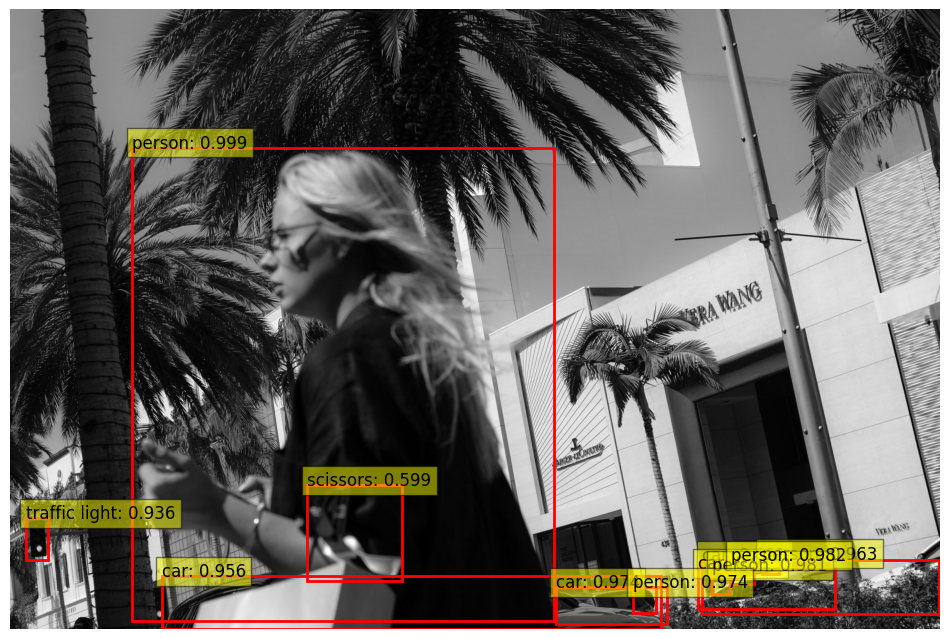

In [8]:
# Plot the image with bounding boxes
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    
    # Print detected objects
    print(f"Detected {model.config.id2label[label.item()]} with confidence {round(score.item(), 3)} at location {box}")
    
    xmin, ymin, xmax, ymax = box
    width, height = xmax - xmin, ymax - ymin
    
    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
    
    ax.add_patch(rect)
    ax.text(xmin, ymin, f'{model.config.id2label[label.item()]}: {round(score.item(), 3)}', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))

plt.axis('off')
plt.show()